In [12]:
import os
import re

import pandas as pd

data_path = os.path.abspath("../data")

In [3]:
data = pd.read_csv(os.path.join(data_path, "clean_data/clean_data.csv"))
data

,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection.Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card.General-purpose cr...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account.Checking account
...,...,...
18958,My husband passed away. Chase bank put check o...,Checking or savings account.Checking account
18959,After being a Chase Card customer for well ove...,Credit card or prepaid card.General-purpose cr...
18960,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card.General-purpose cr...
18961,I am not familiar with XXXX pay and did not un...,Checking or savings account.Checking account


Tenemos 78 clases a clasificar

In [4]:
data.ticket_classification.nunique()

78

Revisamos el histograma y el boxplot de la cantidad deveces que aparece cada clase y nos damos cuenta que existen muchas con pocos valores, por los que predecir esas se volverá complicado, agruparemos las clases menos frecuentes en una sola clase que sea "Other"

<Axes: >

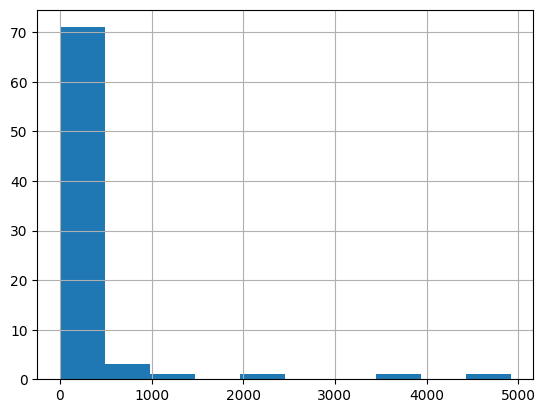

In [6]:
data.ticket_classification.value_counts().hist()

<Axes: >

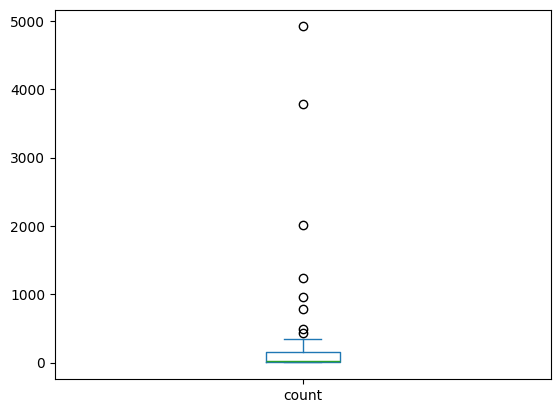

In [8]:
data.ticket_classification.value_counts().plot.box()

In [ ]:
mask = data.ticket_classification.map(data.ticket_classification.value_counts()) < 500
data.ticket_classification =  data.ticket_classification.mask(mask, 'Other')
data.ticket_classification.value_counts()

ticket_classification
other                                                                                            5264
Credit card or prepaid card.General-purpose credit card or charge card                           4918
Checking or savings account.Checking account                                                     3788
Credit reporting, credit repair services, or other personal consumer reports.Credit reporting    2011
Bank account or service.Checking account                                                         1242
Mortgage.Conventional home mortgage                                                               955
Mortgage.Conventional fixed mortgage                                                              785
Name: count, dtype: int64

Reemovemos la información censurada para poder manejar el string sin la misma

In [19]:
data.complaint_what_happened = data.complaint_what_happened.apply(lambda x: re.sub("X.*? ", "", x))
data

,complaint_what_happened,ticket_classification
0,Good morning my name is and I appreciate it if...,other
1,I upgraded my card in and was told by the agen...,Credit card or prepaid card.General-purpose cr...
2,"Chase Card was reported on However, fraudulent...",other
3,"On while trying to book a ticket, I came acr...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account.Checking account
...,...,...
18958,My husband passed away. Chase bank put check o...,Checking or savings account.Checking account
18959,After being a Chase Card customer for well ove...,Credit card or prepaid card.General-purpose cr...
18960,"On Wednesday, I called Chas, my Visa Credit Ca...",Credit card or prepaid card.General-purpose cr...
18961,I am not familiar with pay and did not underst...,Checking or savings account.Checking account


Corroboramos la longitud de las quejas, notamos que existe una gran representación de las quejas relativamente cortas

<Axes: >

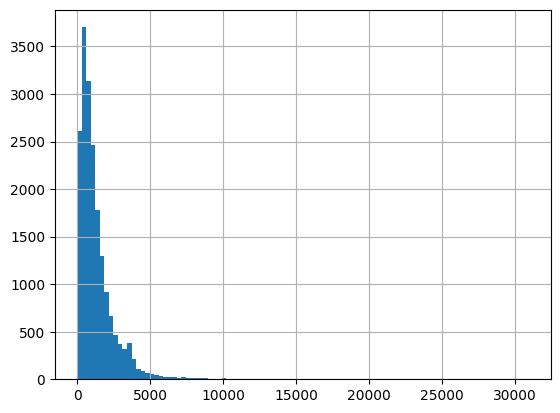

In [21]:
data.complaint_what_happened.apply(len).hist(bins = 100)